# Water For all - Model to classify the Water Potability - Isra

In [3]:
# Import Libraries
#System
import os 

#Warnings
import warnings
warnings.filterwarnings('ignore')

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt
import time

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'



### Standarizing Visualizations

In [68]:
# default plotting styles - Use This Function
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None 
set_sns_format(width=7, height=4)

## Business Understanding


#### Link to business Problem 

* Company occupation

Water For All is a world wide Laboratory specialized in water quality analysis.

Water For wants to create a hand device to analyze the potability of water.  

* Business Problem

Water For All has contacted his Data Scientist Department to create a model which will be deployed in all his Hand Devices to Check the Water Potability. 

Water For All has created a sensor for every feature on the Dataset. 


#### About Dataset

* Context

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

* Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Data Mining

In [5]:
## Read the Dataset

df = pd.read_csv("./dataset/water_potability.csv")

#### Short understanding of the Dataset


In [6]:
#Shape
df.shape

(3276, 10)

In [59]:
df['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Data Cleaning

In [1]:
#OUTLIERS

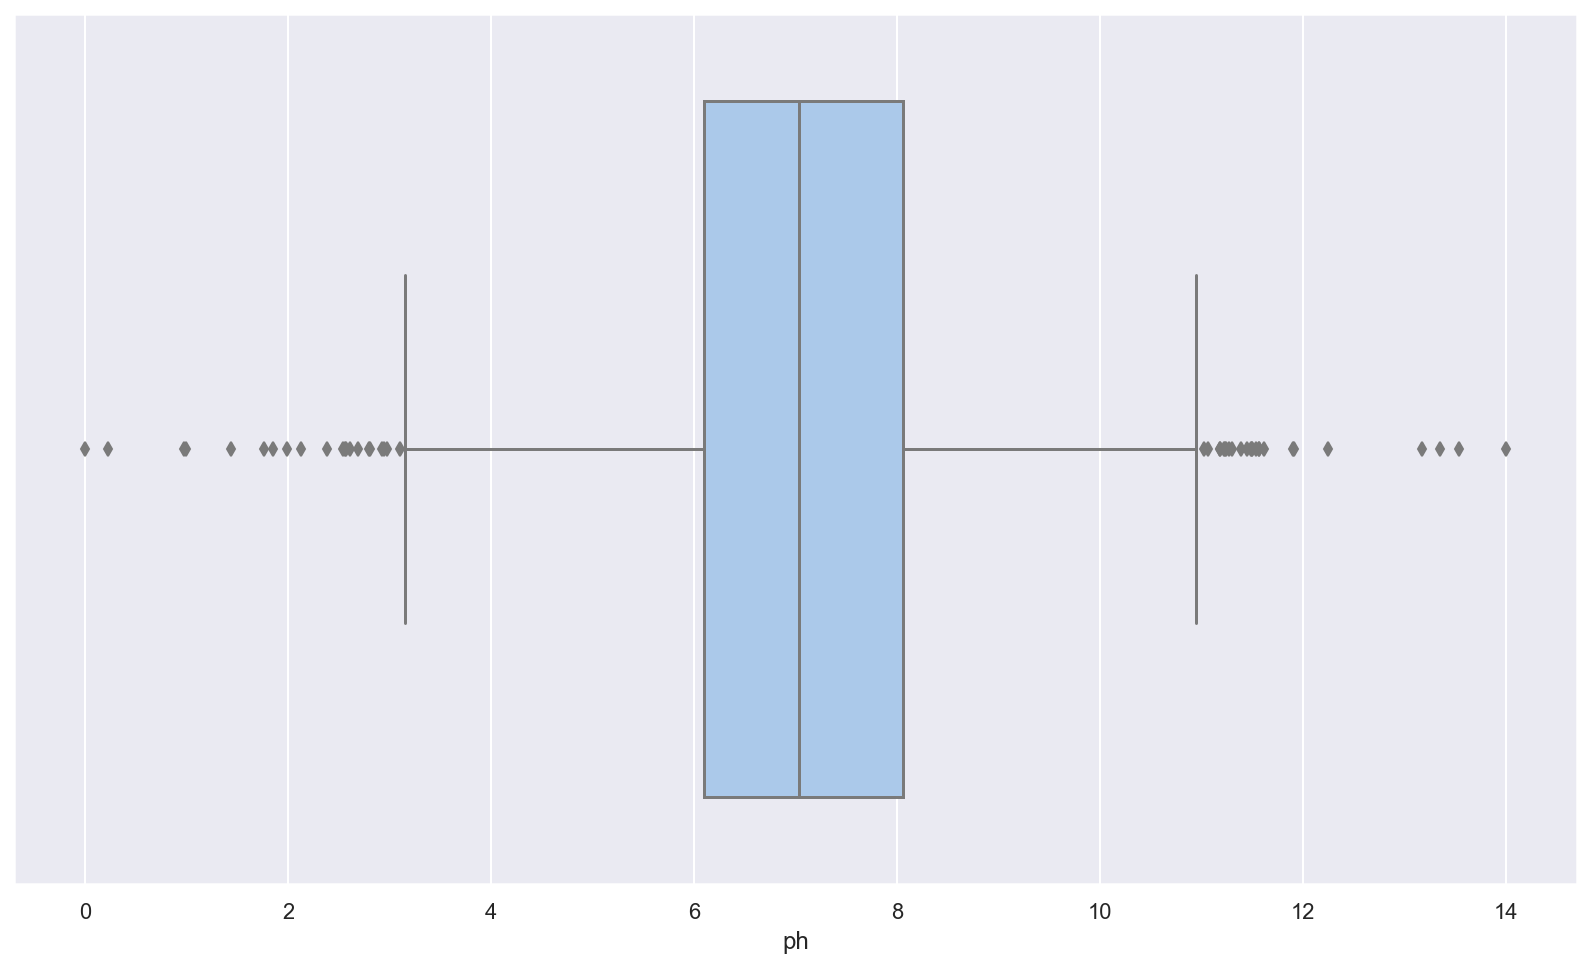

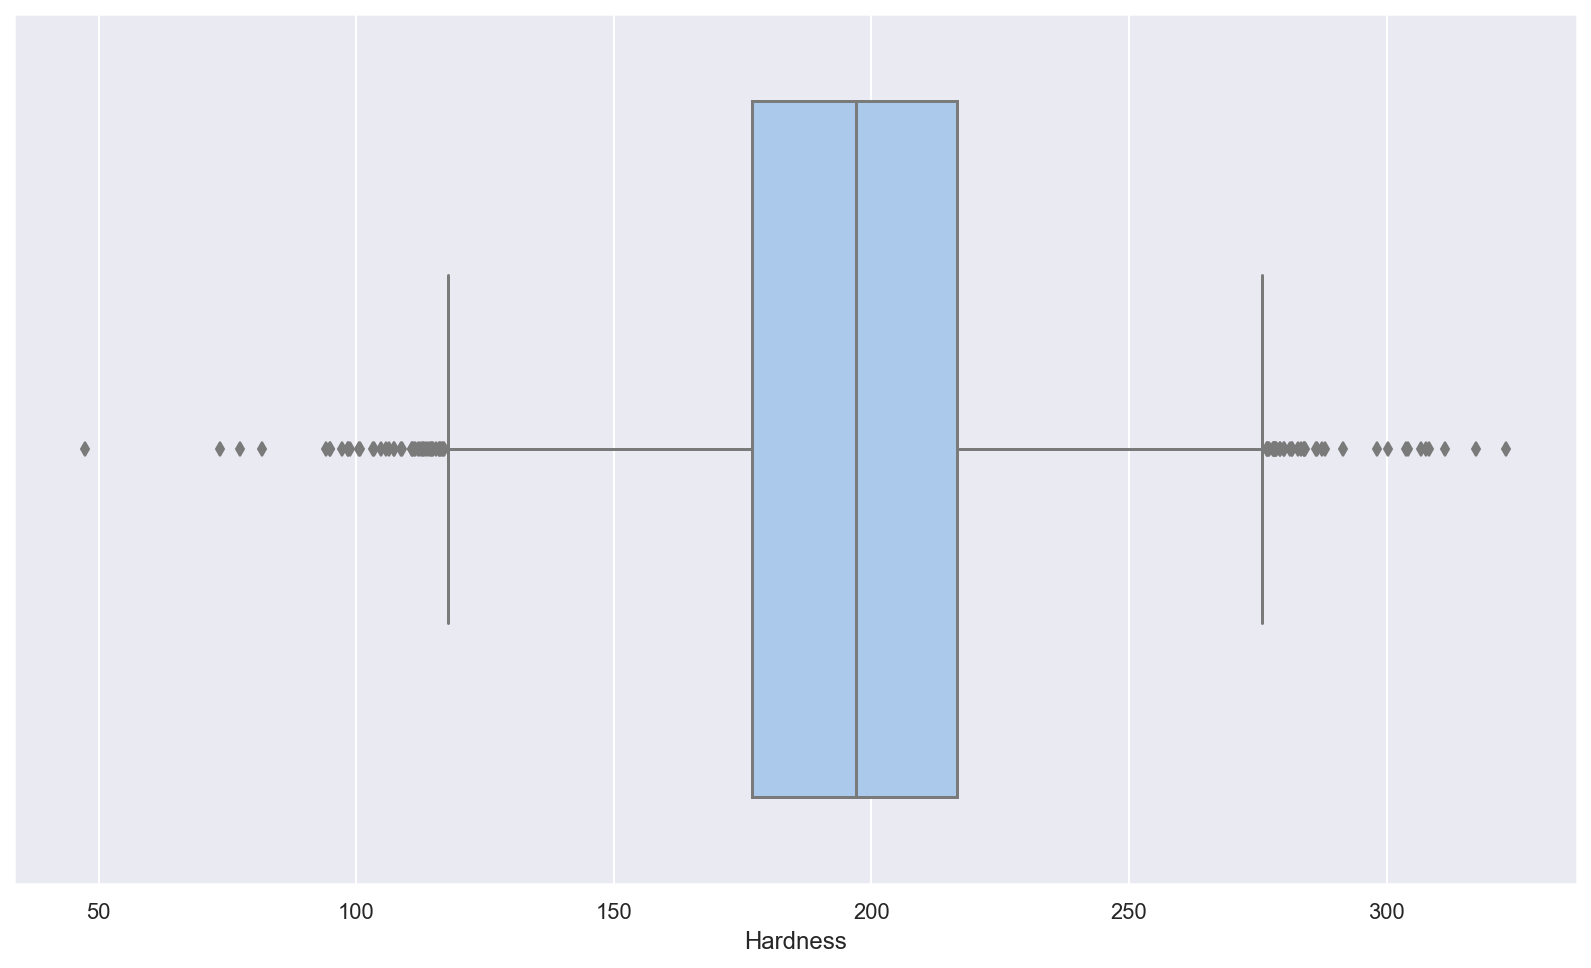

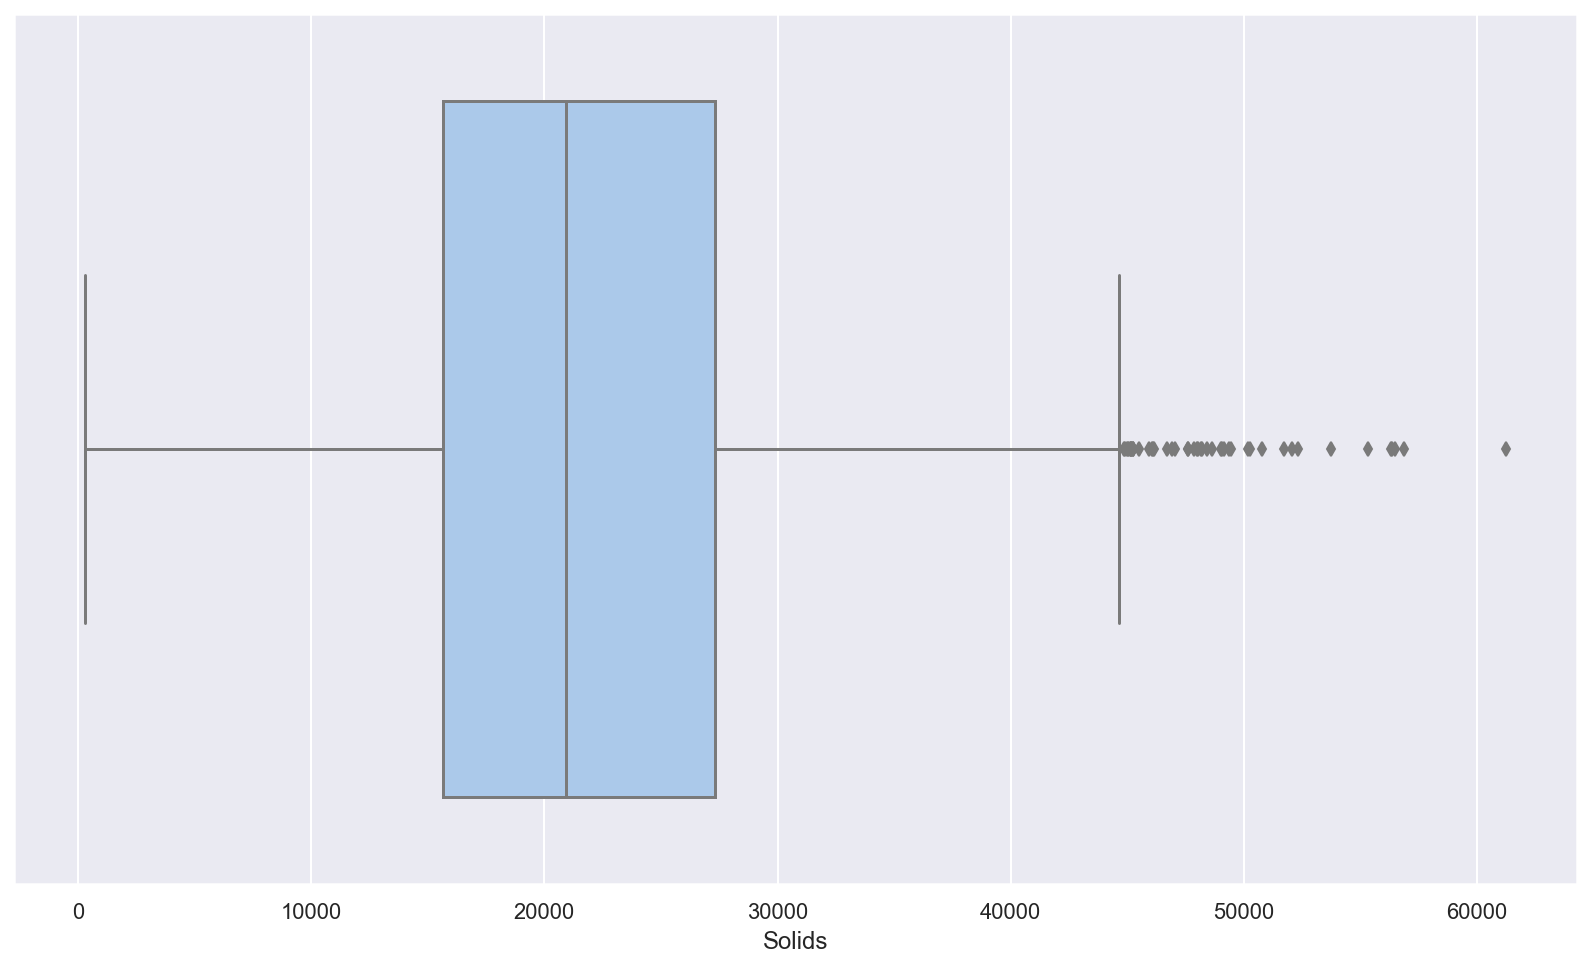

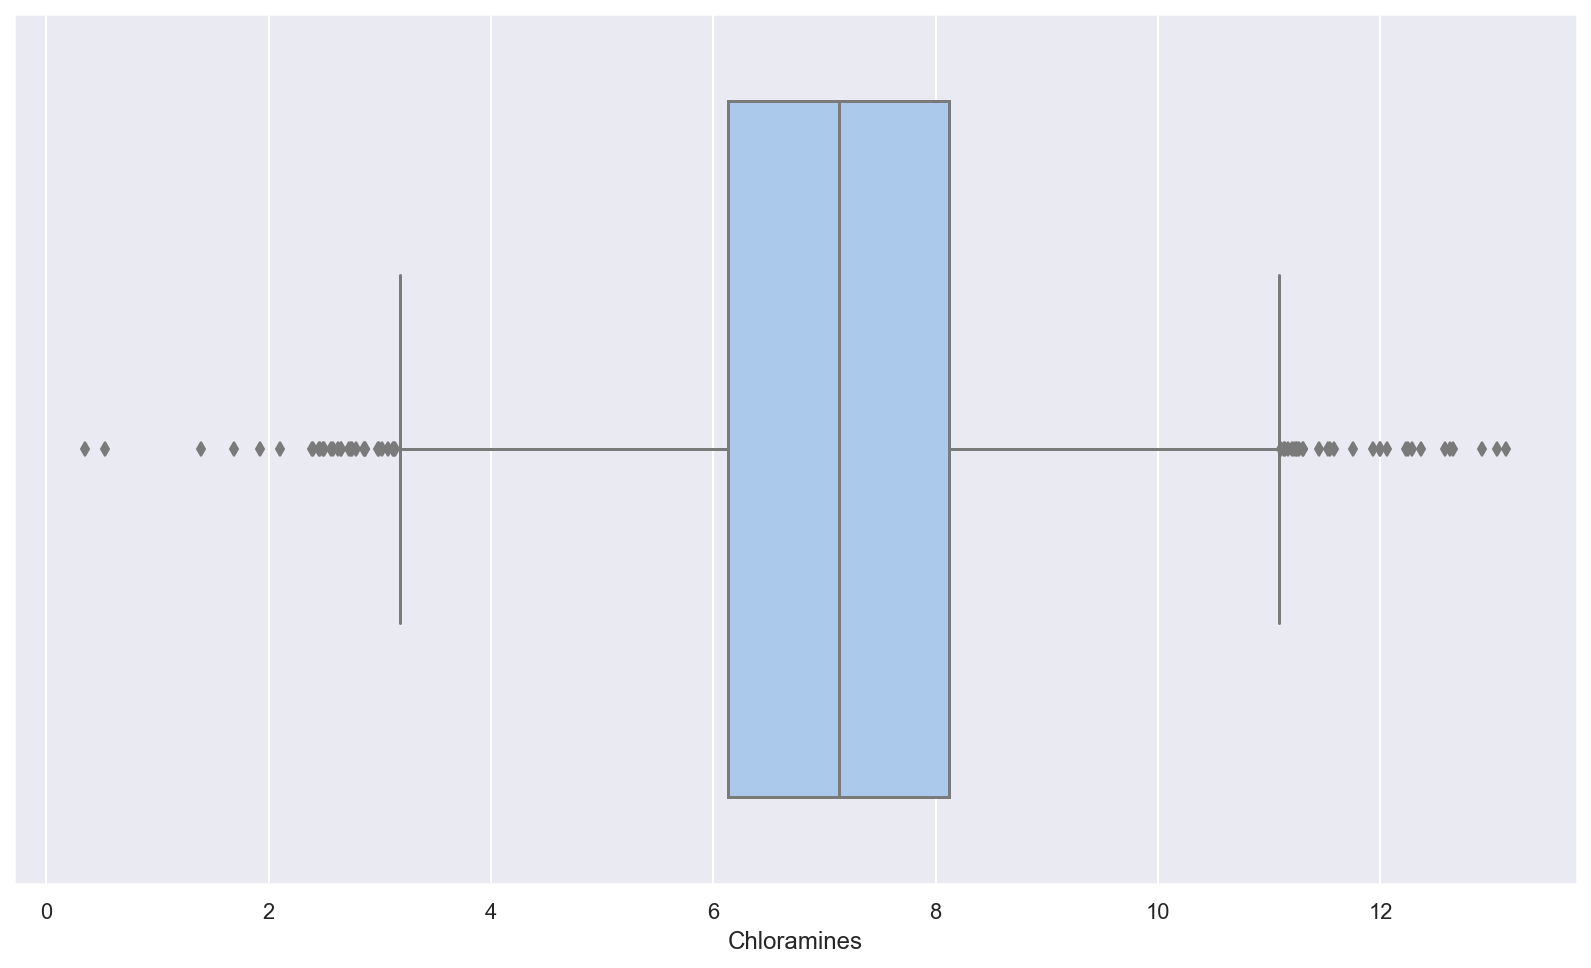

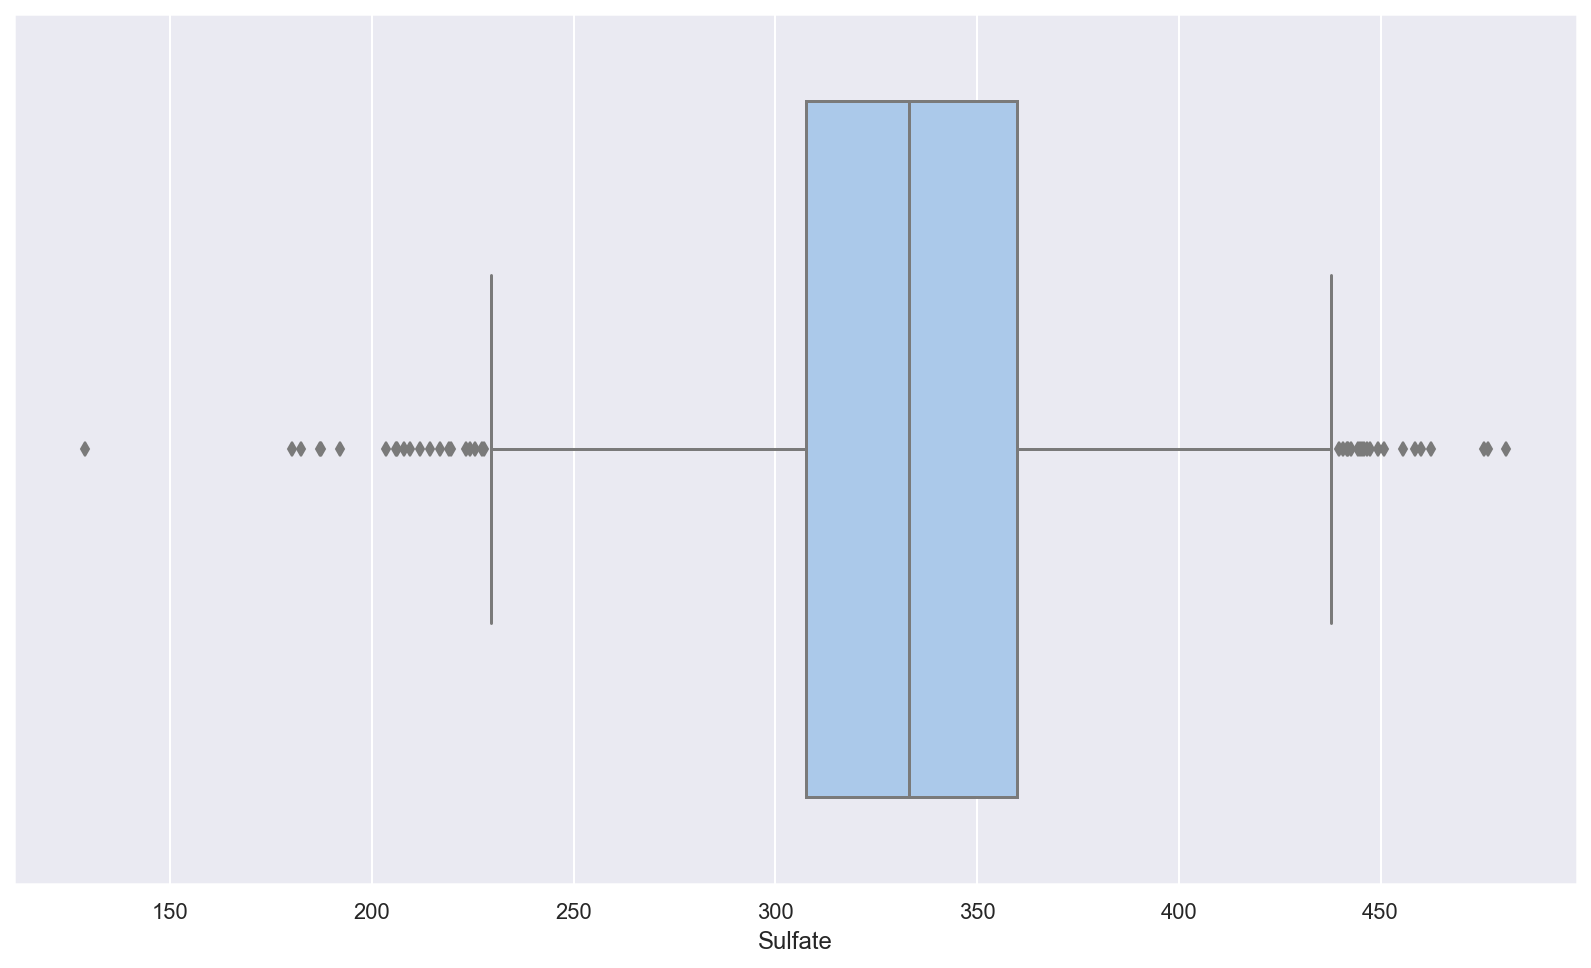

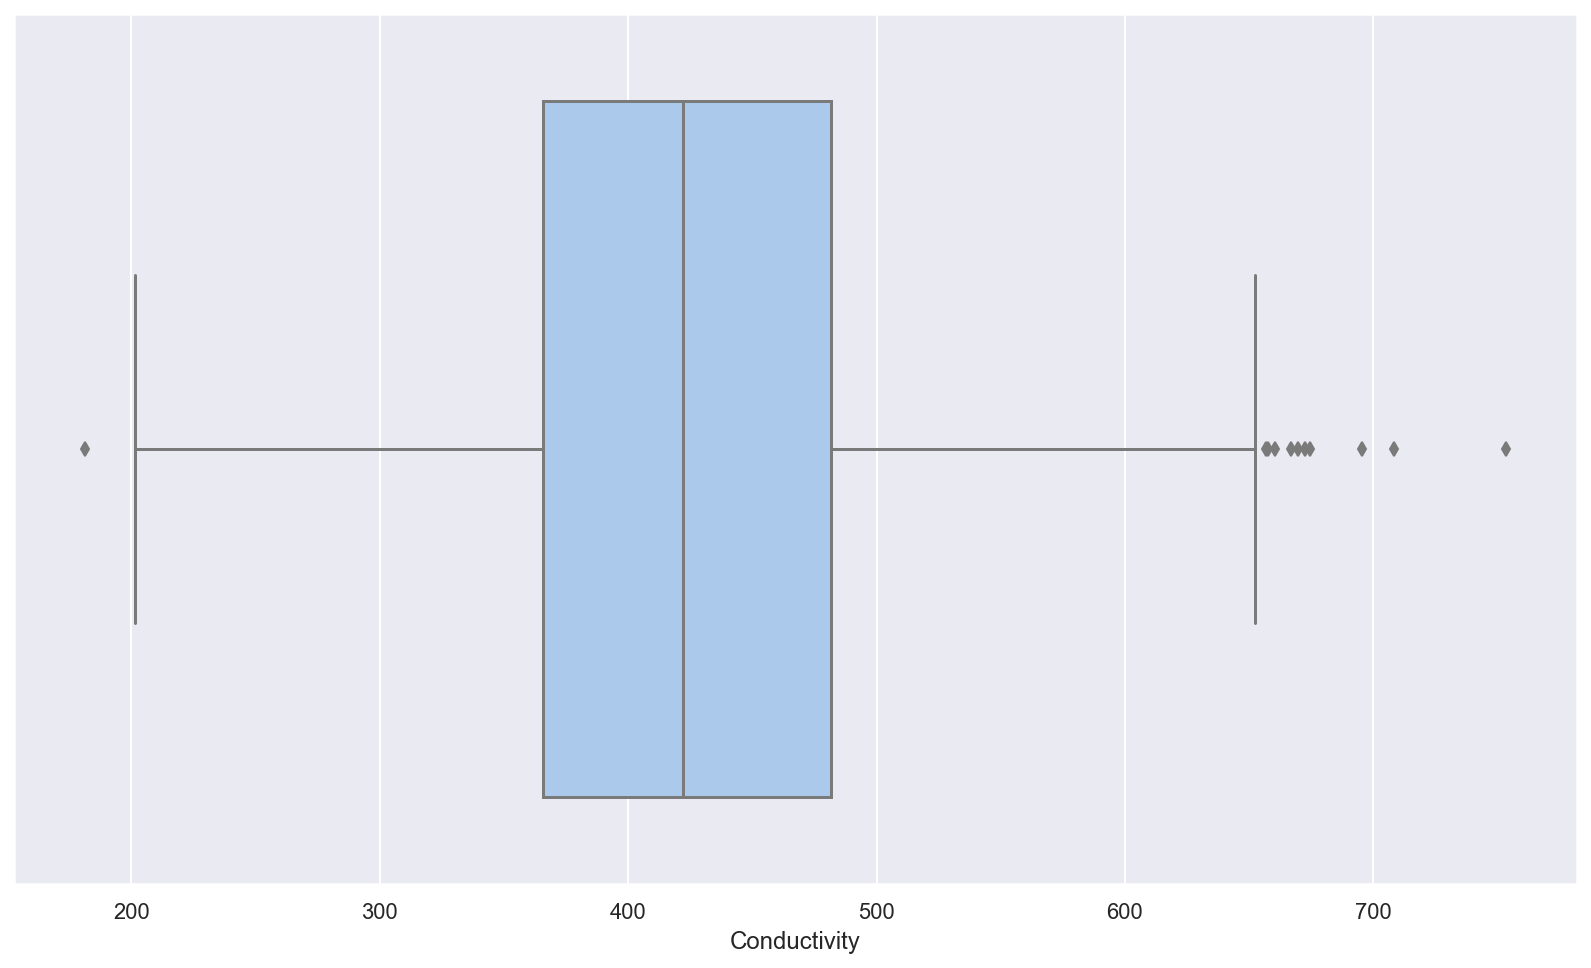

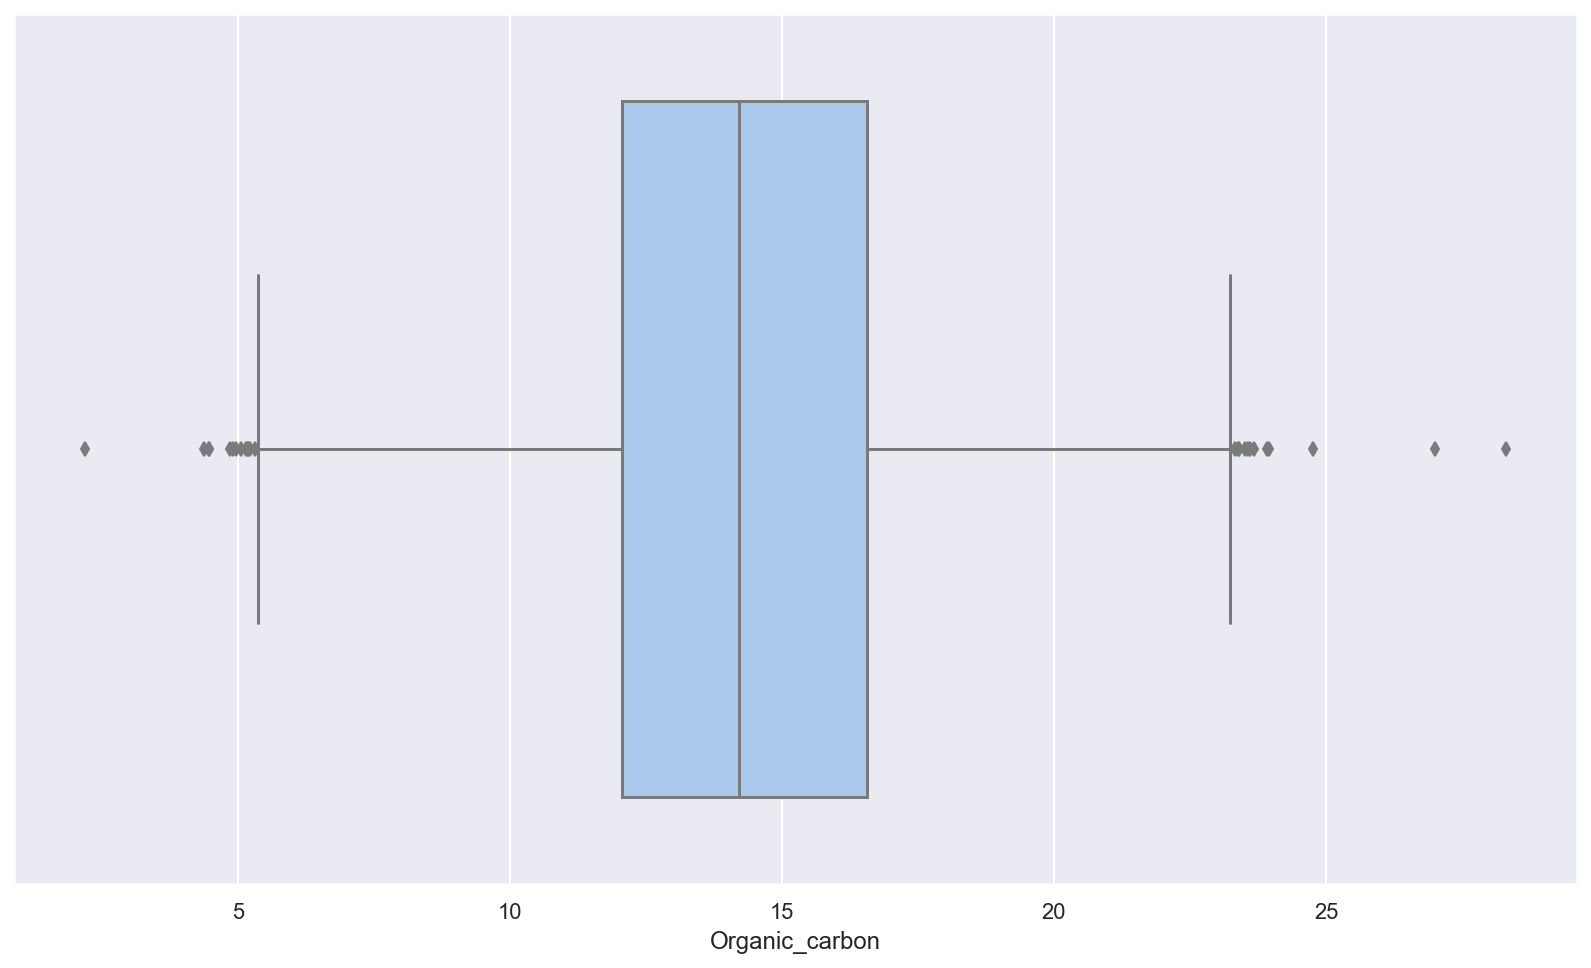

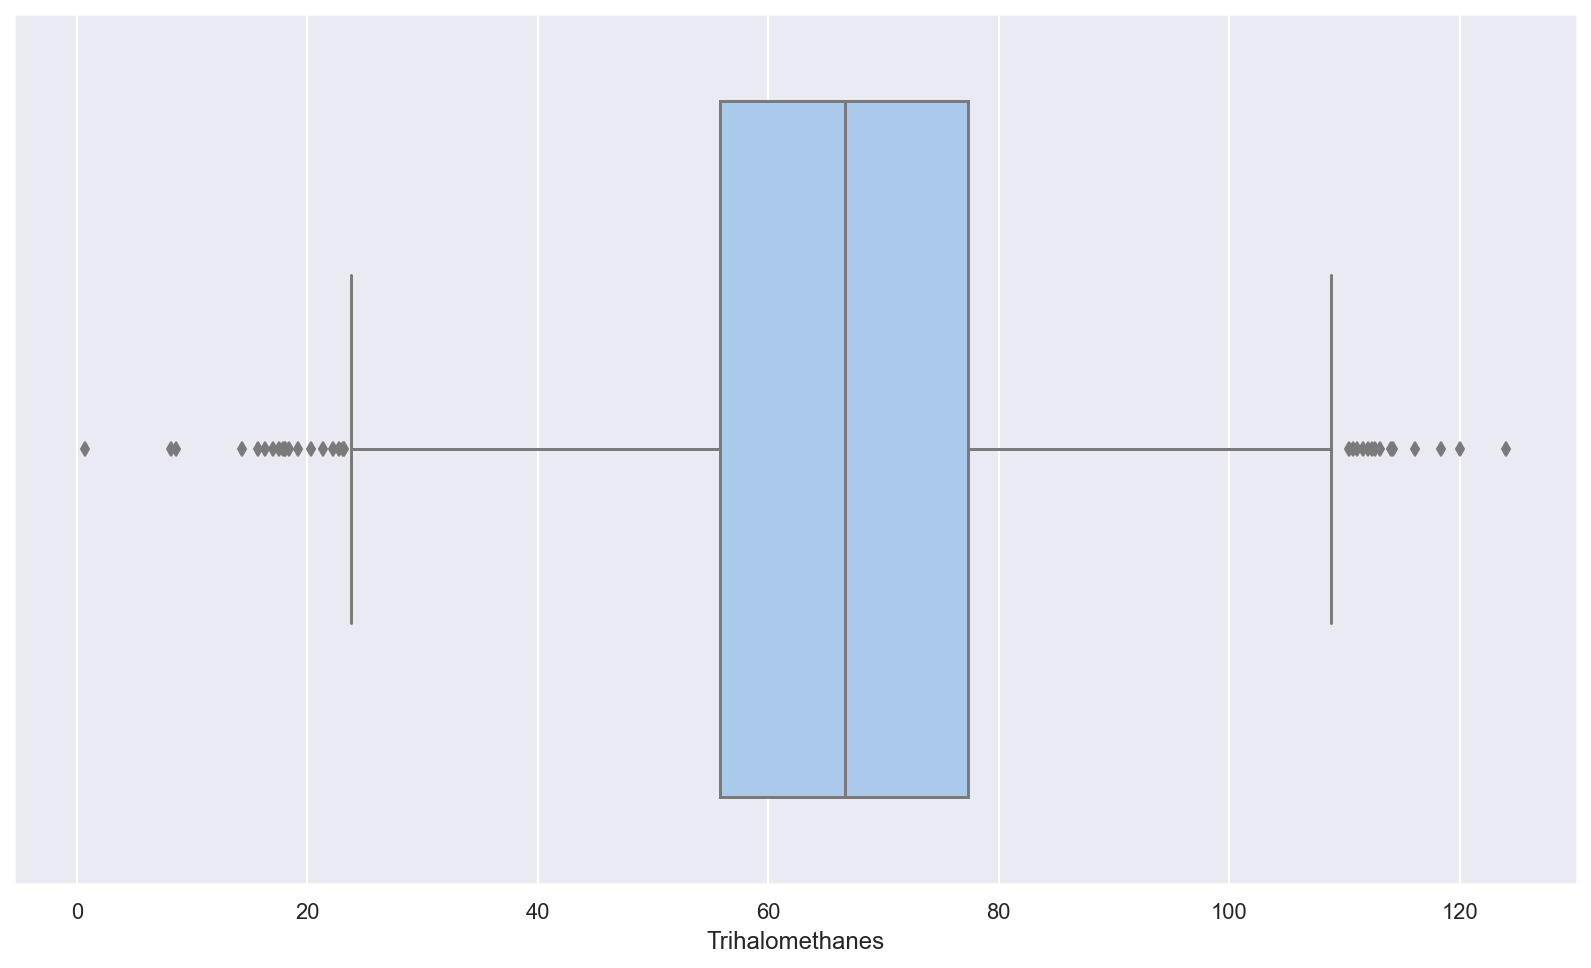

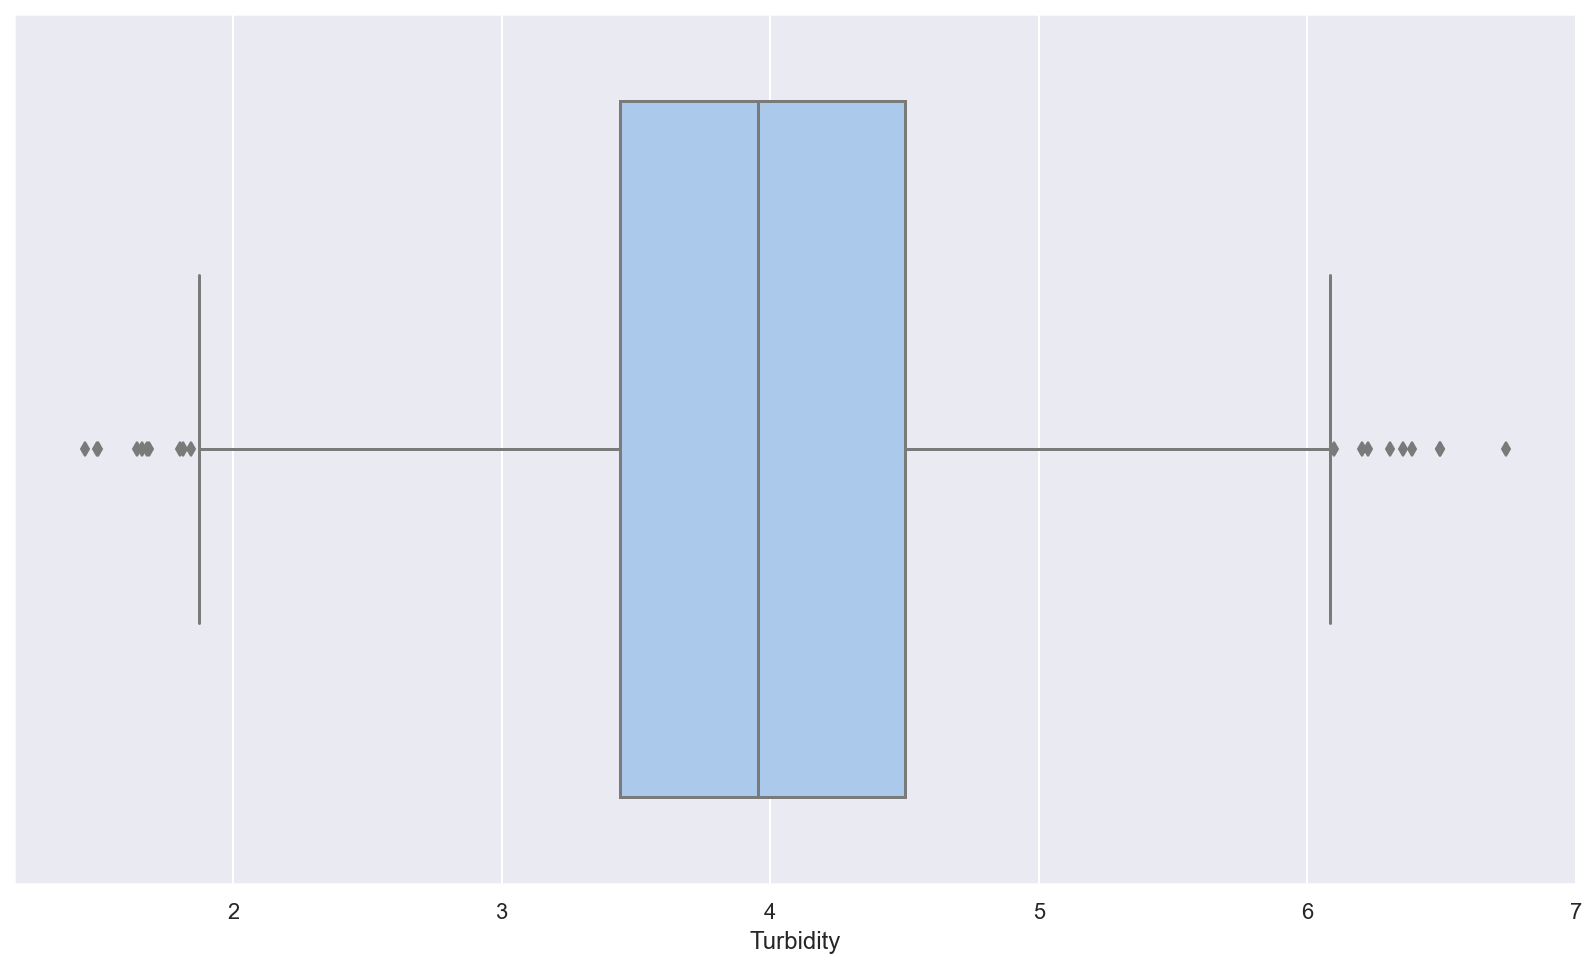

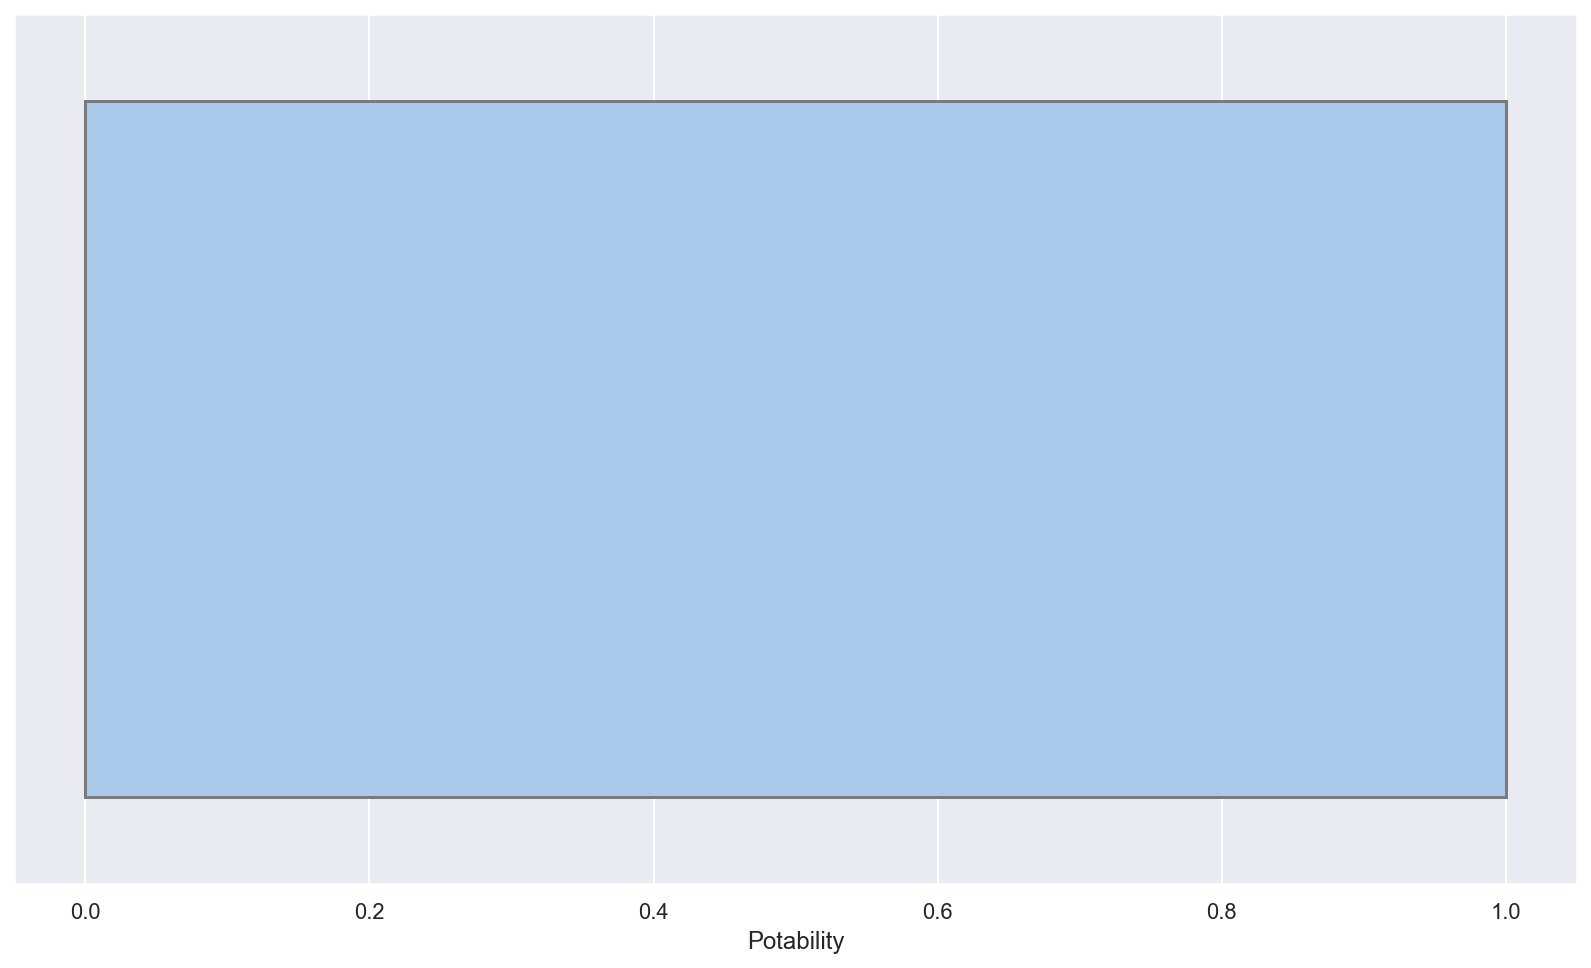

In [14]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

In [47]:
from sklearn.impute import KNNImputer

In [123]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=10, weights="uniform")

In [53]:
l = imputer.fit_transform(df)

In [152]:
def missing_values_KNN_imptuter(df):
    neighbors = [2, 4, 6, 8, 10]
    for n in neighbors: 
        imputer = KNNImputer(n_neighbors=n, weights="uniform")
        l = imputer.fit_transform(df)
        exec(f'df{n} = pd.DataFrame(l, columns=df{n}.columns)')
    table = pd.concat([df['ph'].describe(), df2['ph'].describe(), df4['ph'].describe(), df6['ph'].describe(), df8['ph'].describe(), df10['ph'].describe()], 
    axis=1, keys=['PH', 'PH2', 'PH4', 'PH6', 'PH8','PH10'])
    return table, df, df2, df4, df6, df8, df10

In [153]:
table, df, df2, df4, df6, df8, df10 = missing_values_KNN_imptuter(df)

In [154]:
table

,PH,PH2,PH4,PH6,PH8,PH10
count,2785.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,7.079136,7.075520,7.079273,7.078470,7.079837
std,1.594320,1.532524,1.505125,1.492986,1.487870,1.484111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.093092,6.114968,6.168301,6.206682,6.217584,6.254505
50%,7.036752,7.035894,7.039150,7.043585,7.042989,7.034555
75%,8.062066,8.018787,7.959669,7.947736,7.918103,7.913438
max,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000


In [62]:
y = df10['Potability']

X = df10[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]


In [65]:
X = df10[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

In [66]:

import numpy as np
import matplotib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

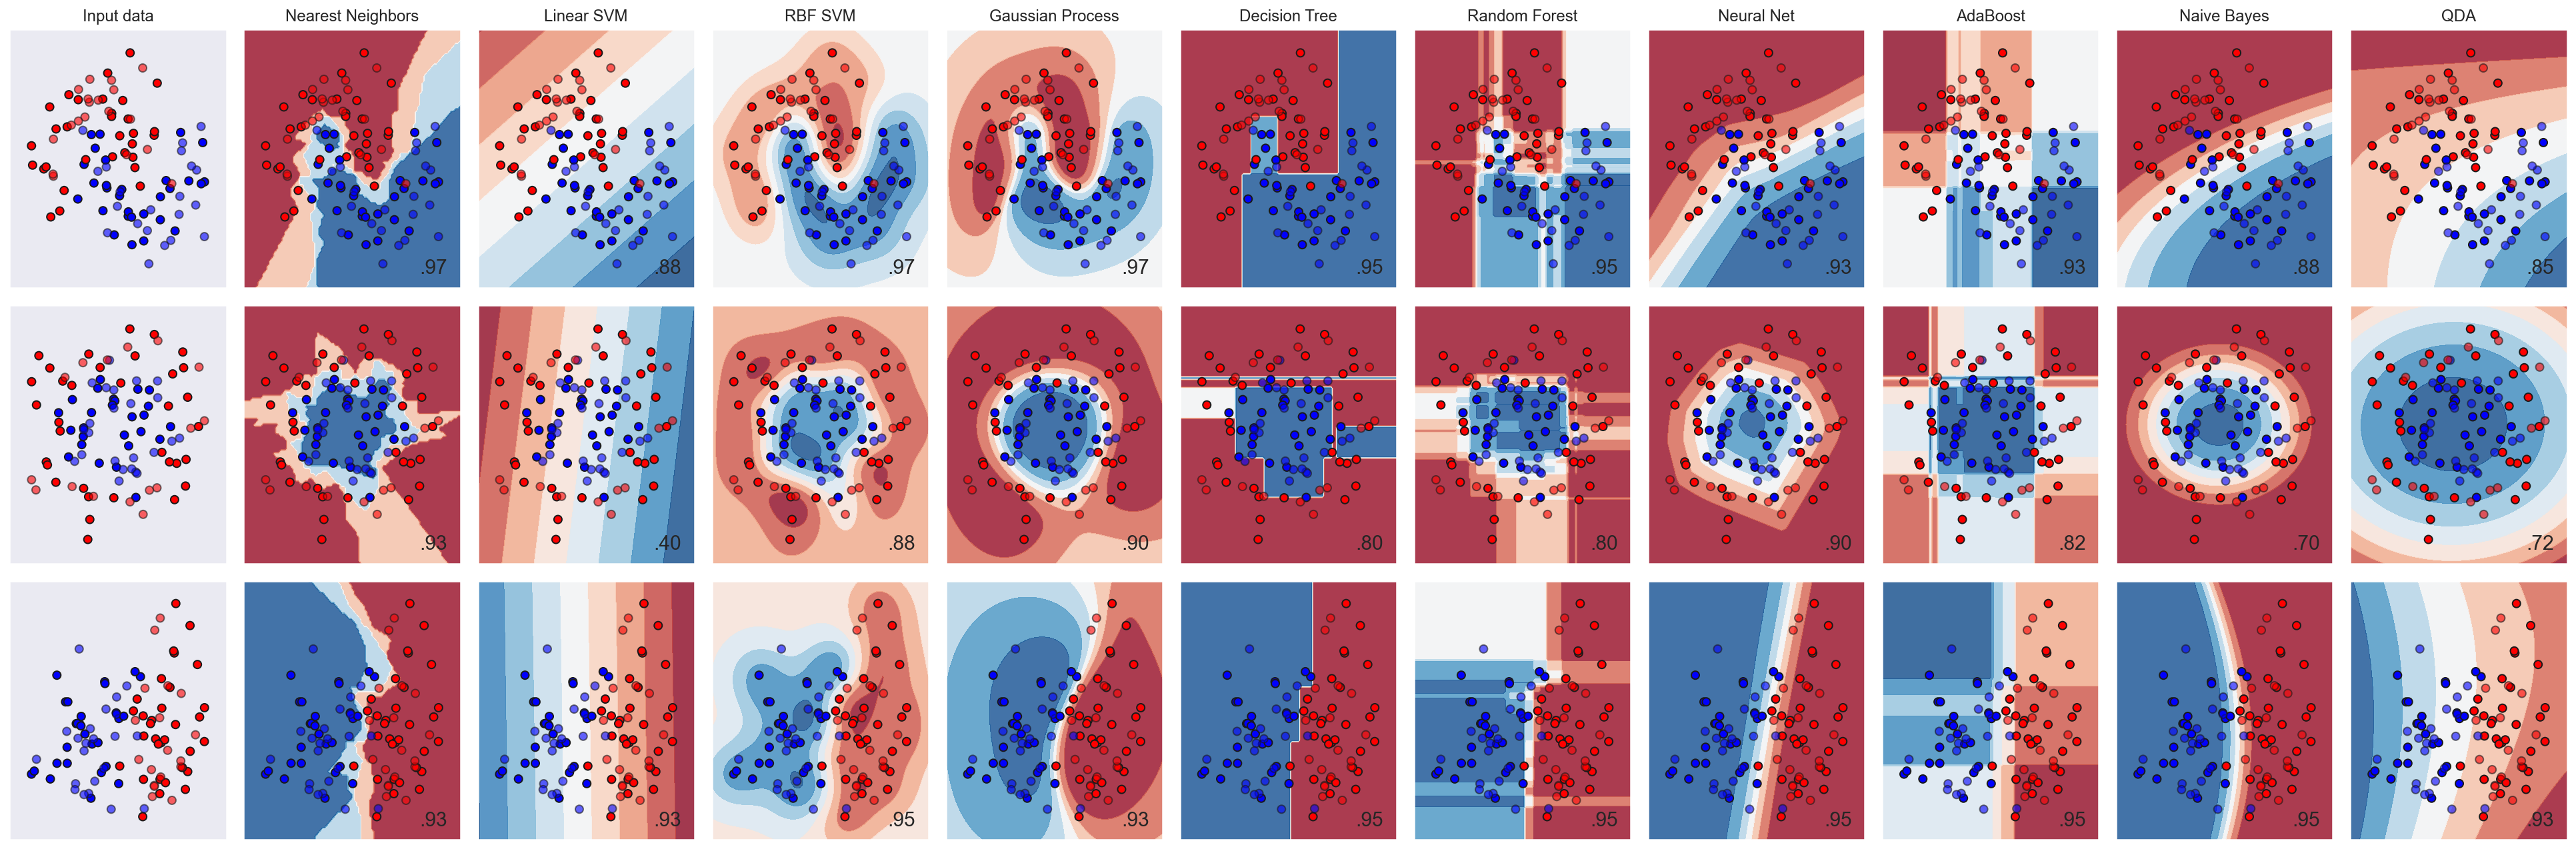

In [69]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [54]:
df10 = pd.DataFrame(l, columns=df.columns)

In [50]:
df5 = pd.DataFrame(l, columns=df.columns)

In [44]:
df2 = pd.DataFrame(l, columns=df.columns)

In [60]:
pd.concat([df['ph'].describe(), df2['ph'].describe(), df5['ph'].describe(), df10['ph'].describe()], axis=1, keys=['PH', 'PH2', 'PH5', 'PH10'])

,PH,PH2,PH5,PH10
count,2785.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,7.078167,7.078167,7.079837
std,1.594320,1.497228,1.497228,1.484111
min,0.000000,0.000000,0.000000,0.000000
25%,6.093092,6.187017,6.187017,6.254505
50%,7.036752,7.052221,7.052221,7.034555
75%,8.062066,7.948570,7.948570,7.913438
max,14.000000,14.000000,14.000000,14.000000


In [39]:
df2['ph'].describe()

count    3276.000000
mean        7.078167
std         1.497228
min         0.000000
25%         6.187017
50%         7.052221
75%         7.948570
max        14.000000
Name: ph, dtype: float64

In [40]:
df['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

<AxesSubplot:xlabel='ph', ylabel='Density'>

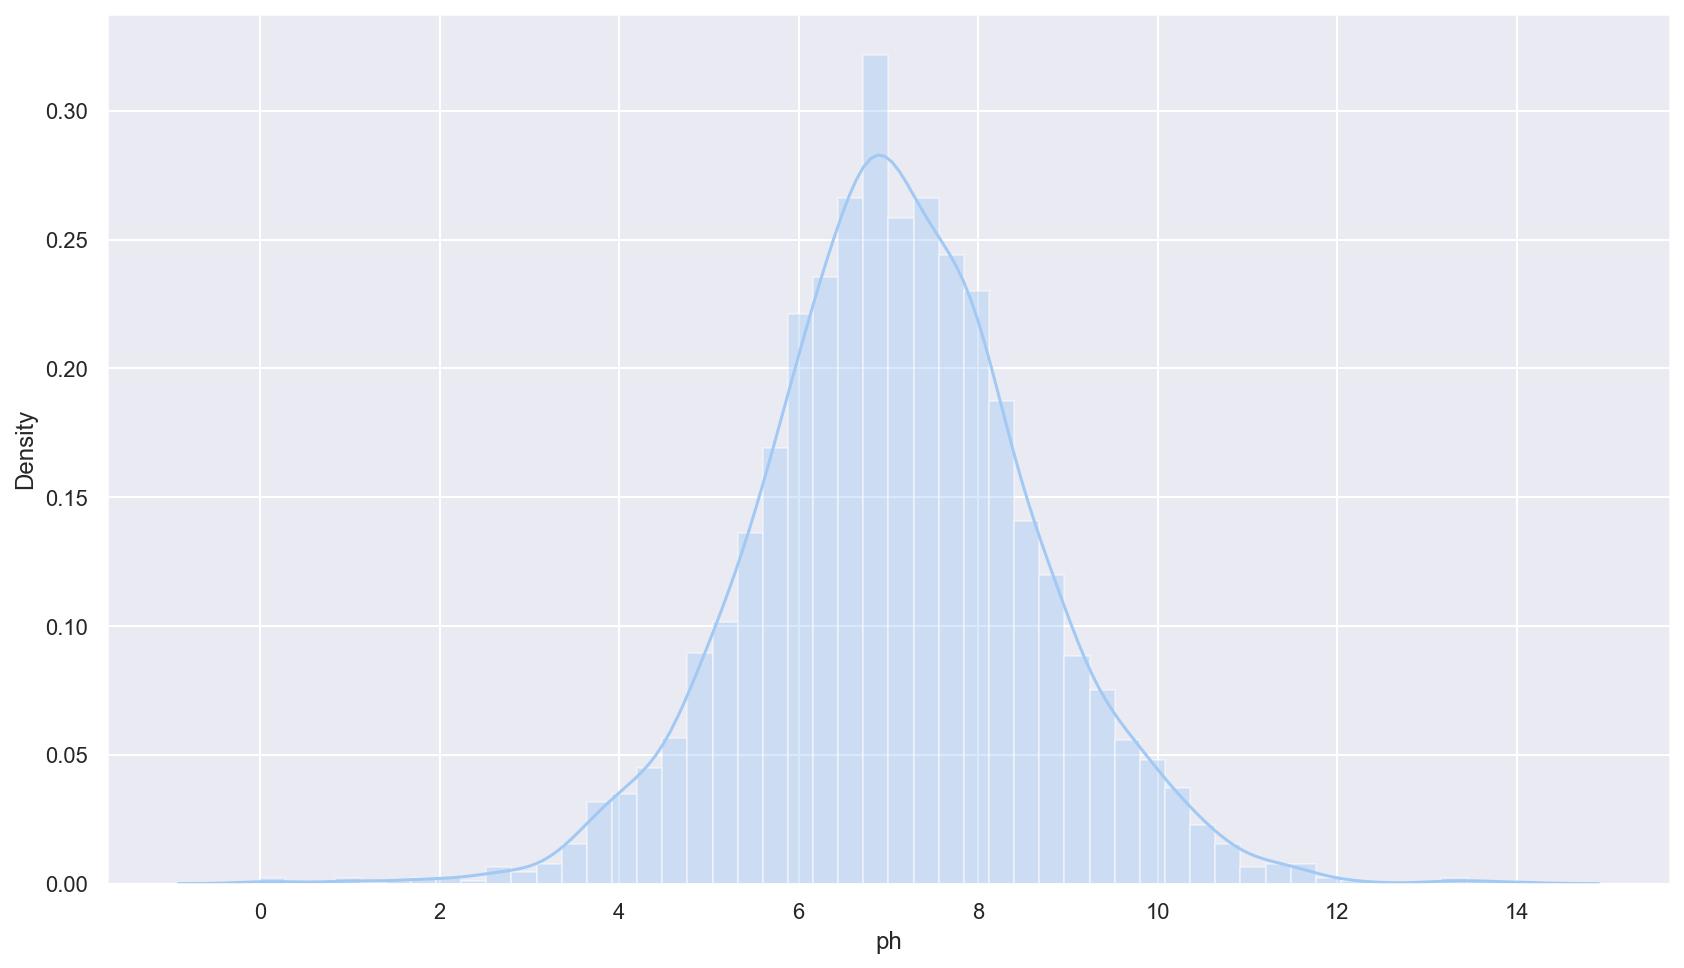

In [30]:
sns.distplot(df2['ph'])

In [11]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<AxesSubplot:xlabel='ph'>

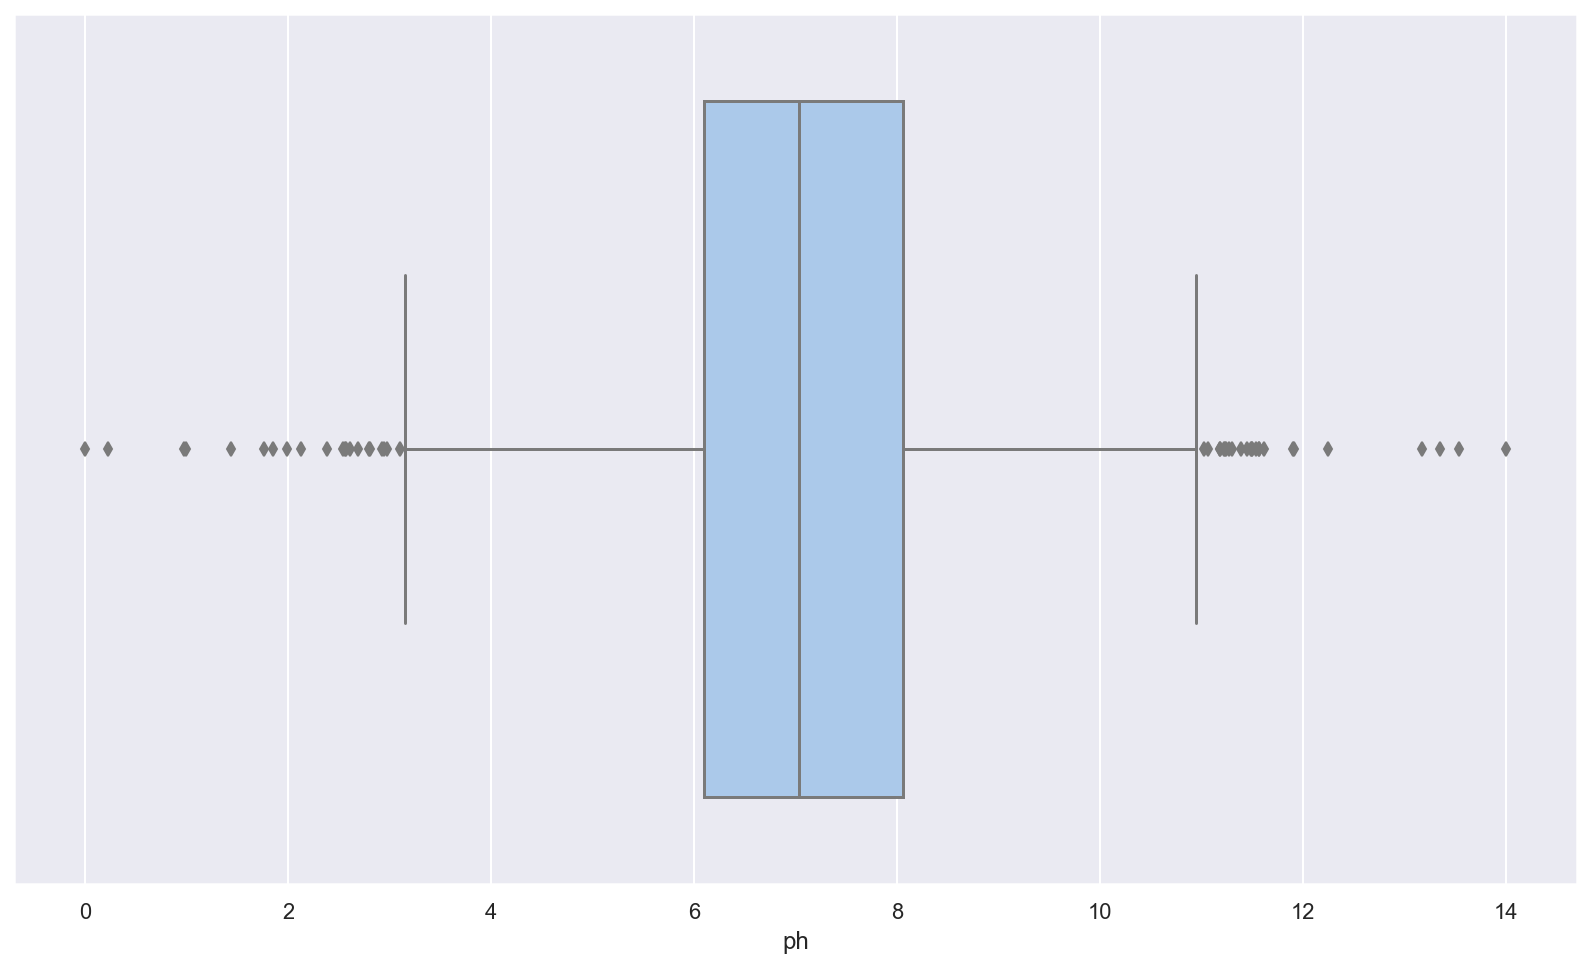

In [12]:
sns.boxplot(x=df['ph'])

In [122]:
df.shape

(3276, 10)

In [ ]:
for col in df.columns:
    

## Data Exploration

## Feature Egineenring

In [91]:
y = df10['Potability']

X = df10[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

In [92]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [93]:
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2620

## Predictive Models

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)  # After Confusion Matrix Analys for K3 and K27. We have less False Postive and it is the most important to avoid killing anyone
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [113]:
## predictions on the test set
# y= f(X)

y_pred = knn.predict(X_test)

In [114]:
# accuracy of the model on the test set
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6234756097560976

In [115]:
y_test.value_counts()

0.0    412
1.0    244
Name: Potability, dtype: int64

Maximum accuracy:  0.6692073170731707  at K  27


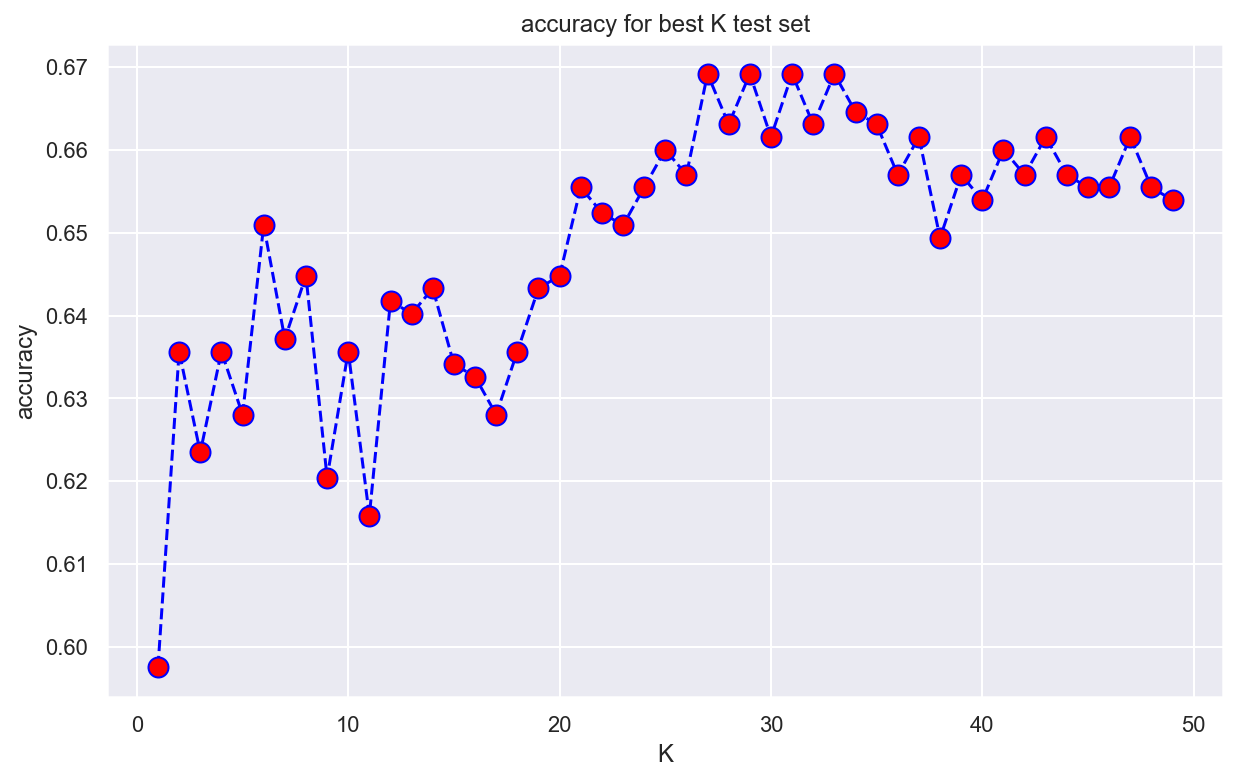

In [116]:
# check visually how to choose K with accuracy test set

#accuracy=[.., ..., ..., ..., ..., ]
accuracy=[]

for neighbor in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("accuracy for best K test set")
plt.xlabel("K")
plt.ylabel("accuracy")
print("Maximum accuracy: ", max(accuracy), " at K ", accuracy.index(max(accuracy))+1)
      


Maximum f1score:  0.6179815216307234  at K = 3


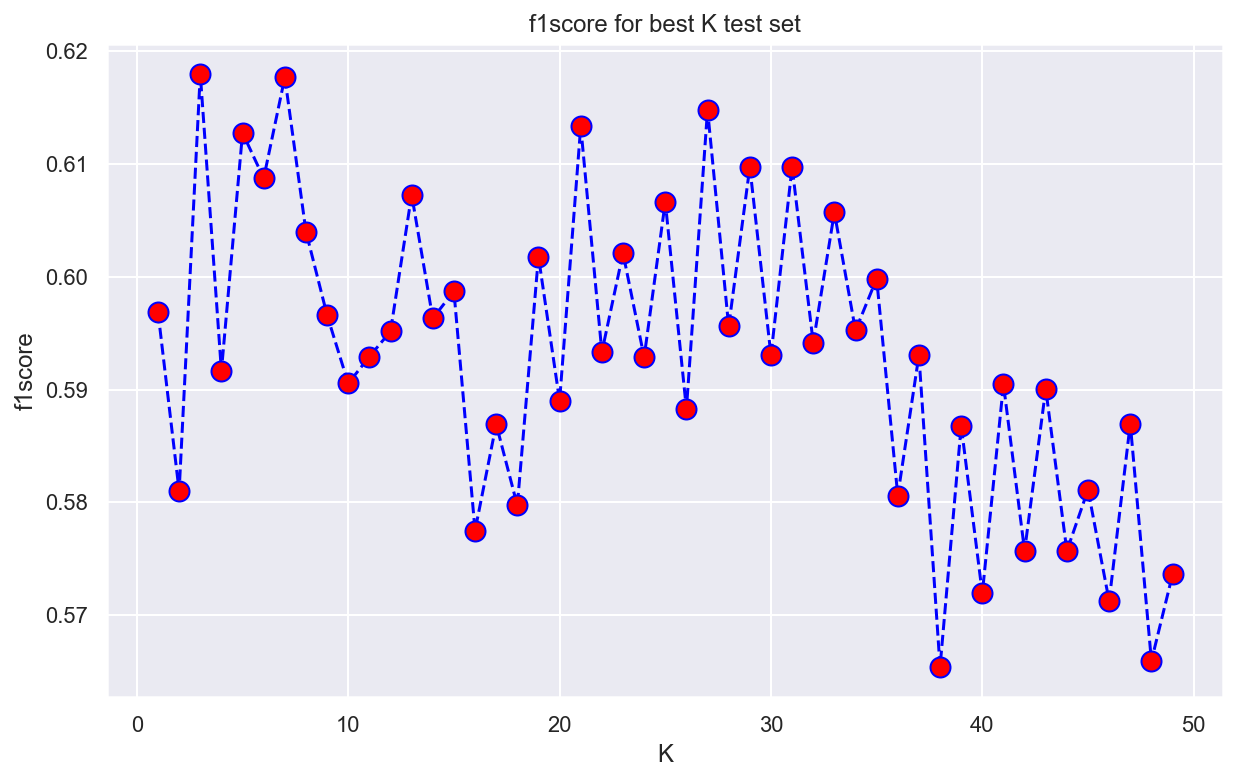

In [117]:
from sklearn.metrics import f1_score
#f1 score on the test set

f1score=[]

for neighbor in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    f1score.append(f1_score(y_test, y_pred, average='weighted'))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), f1score, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("f1score for best K test set")
plt.xlabel("K")
plt.ylabel("f1score")
print("Maximum f1score: ", max(f1score), " at K =", f1score.index(max(f1score))+1)
      


Minimum error rate:  0.3307926829268293  at K  27


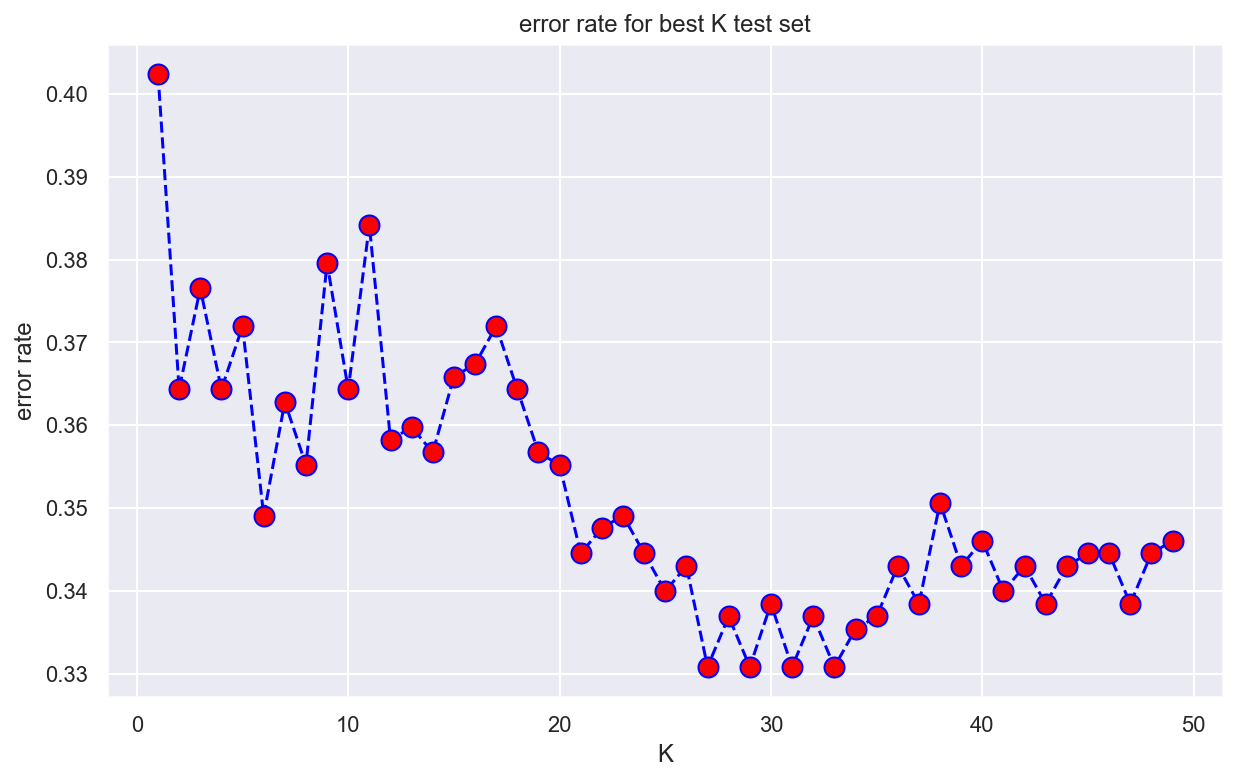

In [118]:
# check visually how to choose K with error rate

#accuracy=[.., ..., ..., ..., ..., ]
error_rate=[]

for neighbor in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("error rate for best K test set")
plt.xlabel("K")
plt.ylabel("error rate")
print("Minimum error rate: ", min(error_rate), " at K ", error_rate.index(min(error_rate))+1)
      

In [119]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[395  17]
 [210  34]]

True Positives(TP) =  395

True Negatives(TN) =  34

False Positives(FP) =  17

False Negatives(FN) =  210


In [120]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[395  17]
 [210  34]]

True Positives(TP) =  395

True Negatives(TN) =  34

False Positives(FP) =  17

False Negatives(FN) =  210


In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.96      0.78       412
         1.0       0.67      0.14      0.23       244

    accuracy                           0.65       656
   macro avg       0.66      0.55      0.50       656
weighted avg       0.66      0.65      0.57       656



## Data Visualizations

KNN 
Decision tree
Random Forest
Logistic Regression
    * Ridge
    * Lasso 

    

Linear Regression

